In [1]:
%matplotlib inline
from sedpy import attenuation
import pylab as p
import numpy as np
from matplotlib import rcParams
import fsps
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
#rcParams['font.family'] = 'sans-serif'
#rcParams['font'] = ['Helvetica']
p.style.use('ggplot')
rcParams['xtick.direction'] = 'in'
rcParams['ytick.direction'] = 'in'
rcParams['axes.linewidth'] = 0.75
rcParams['axes.edgecolor'] = 'black'
rcParams['axes.grid'] = False
rcParams['axes.facecolor'] = '#f4f5f5'
rcParams['xtick.major.size'] = 6
rcParams['ytick.major.size'] = 6

In [2]:
wv_inv = 10**np.linspace(-4,-3,num=100)
wv = 1/wv_inv

In [3]:
pl = attenuation.powerlaw(wv)
calzetti = attenuation.calzetti(wv)
cardelli = attenuation.cardelli(wv)
smc = attenuation.smc(wv)
lmc = attenuation.lmc(wv)

In [39]:
u = fsps.get_filter('sdss_u').transmission
g = fsps.get_filter('sdss_g').transmission
r = fsps.get_filter('sdss_r').transmission
i = fsps.get_filter('sdss_i').transmission
z = fsps.get_filter('sdss_z').transmission
fuv = fsps.get_filter('galex_fuv').transmission
nuv = fsps.get_filter('galex_nuv').transmission

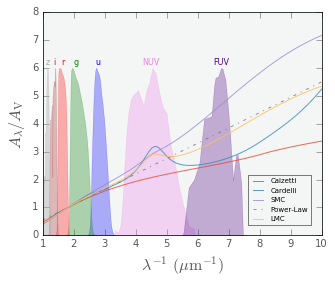

In [109]:
fig,ax = p.subplots(figsize=[5,4])
#ax1 = fig.add_subplot(111)
a = 0.8
ax.plot(wv_inv*1e4,calzetti,label="Calzetti",alpha=a)
ax.plot(wv_inv*1e4,cardelli,label="Cardelli",alpha=a)
ax.plot(wv_inv*1e4,smc,label="SMC",alpha=a)
ax.plot(wv_inv*1e4,pl,label="Power-Law",ls='-.',alpha=a)
ax.plot(wv_inv*1e4,lmc,label="LMC",alpha=a)
ax.set_xlabel(r'$\lambda^{-1}\,\,(\mu{\rm m}^{-1})$',fontsize=16)
ax.set_ylabel(r'$A_\lambda/A_{\rm V}$',fontsize=16)


#ax2 = fig.add_axes([.2,.65,.3,.2])
#ax2.set_xlim(1.0,8.)
#ax2.set_ylim(0,6)
#ax2.set_yscale('log')
#p.yticks(visible=False)
#p.xticks(visible=False)
l = 0.5
s = 'solid'
#ax2.plot(1e4*wv_inv,calzetti,alpha=a,lw=l,ls=s)
#ax2.plot(1e4*wv_inv,cardelli,alpha=a,lw=l,ls=s)
#ax2.plot(1e4*wv_inv,smc,alpha=a,lw=l,ls=s)
#ax2.plot(1e4*wv_inv,lmc,alpha=a,lw=l,ls=s)
#ax2.plot(1e4*wv_inv,pl,alpha=a,lw=l,ls=s)
#ax2.fill_between(1e4/u[0],0,15*u[1],alpha=0.2,color='blue')
#ax2.set_xticks(new_tick_locations)
#ax2.set_xticklabels(tick_function(new_tick_locations))
#ax1.fill_between(1e4/u[0],0,15*u[1],alpha=0.2,color='purple')
ax.fill_between(1e4/u[0],0,6*u[1]/np.max(u[1]),alpha=0.3,color='blue')
ax.fill_between(1e4/g[0],0,6*g[1]/np.max(g[1]),alpha=0.3,color='green')
ax.fill_between(1e4/r[0],0,6*r[1]/np.max(r[1]),alpha=0.3,color='red')
ax.fill_between(1e4/i[0],0,6*i[1]/np.max(i[1]),alpha=0.3,color='brown')
ax.fill_between(1e4/z[0],0,6*z[1]/np.max(z[1]),alpha=0.4,color='darkgrey')
ax.fill_between(1e4/nuv[0],0,6*nuv[1]/np.max(nuv[1]),alpha=0.3,color='violet')
ax.fill_between(1e4/fuv[0],0,6*fuv[1]/np.max(fuv[1]),alpha=0.3,color='indigo')

ax.text(1.1,6.1,"z",color='darkgrey',fontsize=8)
ax.text(1.35,6.1,"i",color='brown',fontsize=8)
ax.text(1.6,6.1,"r",color='red',fontsize=8)
ax.text(2.,6.1,"g",color='green',fontsize=8)
ax.text(2.7,6.1,"u",color='blue',fontsize=8)
ax.text(4.2,6.1,"NUV",color='violet',fontsize=8)
ax.text(6.5,6.1,"FUV",color='indigo',fontsize=8)
#ax1.set_yscale('log')
#ax1.set_xscale('log')
#ax1.set_ylim(0.5,10)
#axins = zoomed_inset_axes(ax,1.25,loc=2)
#axins.set_xlim(1e3,1e4)
#axins.set_ylim(0,6.)
#axins.plot(1e4/wv_inv,pl)
#axins.plot(1./wv_inv*1e4,calzetti)
#axins.plot(1./wv_inv*1e4,cardelli)
#axins.plot(1./wv_inv*1e4,smc)
#axins.plot(1./wv_inv*1e4,lmc)
#axins.fill_between(1e4*u[0],0,15*u[1],alpha=0.2,color='purple')
#axins.fill_between(1e4*g[0],0,15*g[1],alpha=0.2,color='green')
#p.yticks(visible=False)
#p.xticks(visible=False)
#axins.set_aspect(1./3.)
ax.legend(loc=4,fontsize=7,borderaxespad=1.5)

ax.set_xlim(1.,10.)
p.savefig("dust.pdf")

In [52]:
new_tick_locations = np.array([1./.55,1./.2175,1./.1275])

def tick_function(X):
    wv = 1e4/X
    return [r'%f' % z for z in wv]

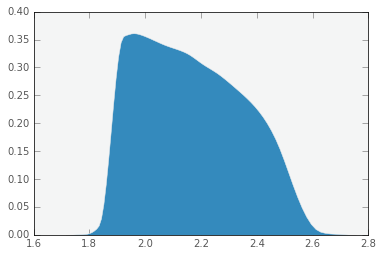

In [80]:
p.fill_between(1e4/g[0],0,g[1])